In [1]:
import numpy as np
import pandas as pd
import json

<h1>
<font color="#15aec3"> Pandas: Limpeza e tratamento de dados</font>
</h1>

Obtenção da base:

```bash
! curl https://cdn3.gnarususercontent.com.br/2929-pandas/dataset-telecon.json > telecon.json
```

<h2>
<font color="#9de482"> Análise de Churn </font>
</h2>

<h2>
<font color="#9de482" > 01 - Conhecendo os dados</font>
</h2>

In [2]:
telecon_path: str = "./data/telecon.json"

df = pd.read_json(telecon_path)

In [3]:
df

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
...,...,...,...,...,...,...
7339,5172-RKOCB,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'dois anos', 'faturamente_eletron..."
7340,1934-MKPXS,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."
7341,5959-BELXA,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
7342,3601-UTZXO,,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."


In [4]:
pd.json_normalize(df['cliente'])

,genero,idoso,parceiro,dependentes,tempo_servico
0,feminino,0,sim,sim,9.0
1,masculino,0,nao,nao,9.0
2,masculino,0,nao,nao,4.0
3,masculino,1,sim,nao,13.0
4,feminino,1,sim,nao,3.0
...,...,...,...,...,...
7339,masculino,0,sim,nao,72.0
7340,masculino,0,sim,sim,33.0
7341,masculino,1,nao,nao,32.0
7342,masculino,0,sim,sim,41.0


In [5]:
pd.json_normalize(df['conta'])

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.90,542.4
2,mes a mes,sim,cheque eletronico,73.90,280.85
3,mes a mes,sim,cheque eletronico,98.00,1237.85
4,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...
7339,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,um ano,nao,transferencia bancaria (automatica),19.50,798.2


Vale a pena usar a biblioteca padrão `json` para normalizar todas as colunas de uma vez.

In [6]:
with open(file=telecon_path) as file:
    raw_json = json.load(file)
    

In [7]:
dados = pd.json_normalize(raw_json)
dados

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,3601-UTZXO,,masculino,0,sim,sim,41.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,transferencia bancaria (automatica),19.50,798.2


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

<h2>
<font color="#9de482"> 02 - Tratamento Inicial dos dados </font>
</h2>

In [9]:
dados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [10]:
dados.dtypes

id_cliente                        object
Churn                             object
cliente.genero                    object
cliente.idoso                      int64
cliente.parceiro                  object
cliente.dependentes               object
cliente.tempo_servico            float64
telefone.servico_telefone         object
telefone.varias_linhas            object
internet.servico_internet         object
internet.seguranca_online         object
internet.backup_online            object
internet.protecao_dispositivo     object
internet.suporte_tecnico          object
internet.tv_streaming             object
internet.filmes_streaming         object
conta.contrato                    object
conta.faturamente_eletronico      object
conta.metodo_pagamento            object
conta.cobranca.mensal            float64
conta.cobranca.Total              object
dtype: object

In [11]:
try:
    dados['conta.cobranca.Total'].astype(np.float64)
except ValueError as e:
    print(f"Erro ao converter coluna:")
    print(e)
    

Erro ao converter coluna:
could not convert string to float: ' '


In [12]:
# Colunas que deram erro no casting
dados[
    dados['conta.cobranca.Total'] == ' '
]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [13]:
registros_n_preenchidos = dados['conta.cobranca.Total'] == ' '
cols_interesse = ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
dados[registros_n_preenchidos][cols_interesse]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [14]:
indexes = dados[registros_n_preenchidos][cols_interesse].index

dados.loc[indexes, 'conta.cobranca.Total'] =dados.loc[indexes, 'conta.cobranca.mensal'] * 24 # dois anos

In [15]:
dados[registros_n_preenchidos][cols_interesse]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,1345.2
1775,0.0,dois anos,20.00,480.0
1955,0.0,dois anos,61.90,1485.6
2075,0.0,dois anos,19.70,472.8
2232,0.0,dois anos,20.25,486.0
2308,0.0,dois anos,25.35,608.4
2930,0.0,dois anos,73.35,1760.4
3134,0.0,dois anos,25.75,618.0
3203,0.0,dois anos,52.55,1261.2
4169,0.0,dois anos,80.85,1940.4


In [16]:
dados.loc[indexes, "cliente.tempo_servico"] = 24

In [17]:
dados[registros_n_preenchidos][cols_interesse]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [18]:
dados['conta.cobranca.Total']  = dados['conta.cobranca.Total'].astype(np.float64)

In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

Identificando e manipulando strings vazias

In [20]:
dados.query("Churn ==''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


226 amostras em `Churn` estão vazias!

In [21]:
dados_sem_vazio = dados[
    dados['Churn'] != ''    
].copy()

In [22]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [23]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

Index: 7118 entries, 0 to 7343 $\rightarrow$ tem índice sendo saltado, (os índices de Churn vazio).

In [24]:
# Resetando o index 0-7117
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [25]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


<h2>
<font color="#9de482"> 03 - Utilizando dados duplicados e nulos </font>
</h2>  

---

<blockquote style="text-align:center">Amostras duplicadas são linhas que contêm exatamente os mesmos valores em todas as colunas</blockquote>

Métodos __Pandas__:
> 1. isnull()  
> 2. notnull()  
> 3. isna()  
> 4. notna()  
---

__identificando e tratando dados duplicados__: `duplicated()`

In [26]:
print(f' Series[bool] : \n{dados_sem_vazio.duplicated()}') # Series[bool] 

print('Número de registros duplicados:', dados_sem_vazio.duplicated().sum()) 

 Series[bool] : 
0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool
Número de registros duplicados: 75


In [27]:
registros_duplicados = dados_sem_vazio.duplicated()

dados_sem_vazio[registros_duplicados]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [28]:
# Remoção:
dados_sem_vazio.drop_duplicates(inplace=True)

In [29]:

dados_sem_vazio.duplicated(), dados_sem_vazio.duplicated().sum()

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7038    False
 7039    False
 7040    False
 7041    False
 7042    False
 Length: 7043, dtype: bool,
 0)

__Dados nulos ou ausentes__

In [30]:
# Podemos olhar o Non-Null Count

dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7043 non-null   object 
 1   Churn                          7043 non-null   object 
 2   cliente.genero                 7043 non-null   object 
 3   cliente.idoso                  7043 non-null   int64  
 4   cliente.parceiro               7043 non-null   object 
 5   cliente.dependentes            7043 non-null   object 
 6   cliente.tempo_servico          7035 non-null   float64
 7   telefone.servico_telefone      7043 non-null   object 
 8   telefone.varias_linhas         7043 non-null   object 
 9   internet.servico_internet      7043 non-null   object 
 10  internet.seguranca_online      7043 non-null   object 
 11  internet.backup_online         7043 non-null   object 
 12  internet.protecao_dispositivo  7043 non-null   object

In [31]:
# Vetorialmente
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [32]:
print(f'Soma dos "na" a partir de {list(dados_sem_vazio.columns[-5:])}: {dados_sem_vazio.isna().sum().sum()}')

Soma dos "na" a partir de ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento', 'conta.cobranca.mensal', 'conta.cobranca.Total']: 114


In [33]:
dados_sem_vazio.loc[0]

id_cliente                       0002-ORFBO
Churn                                   nao
cliente.genero                     feminino
cliente.idoso                             0
cliente.parceiro                        sim
cliente.dependentes                     sim
cliente.tempo_servico                   9.0
telefone.servico_telefone               sim
telefone.varias_linhas                  nao
internet.servico_internet               DSL
internet.seguranca_online               nao
internet.backup_online                  sim
internet.protecao_dispositivo           nao
internet.suporte_tecnico                sim
internet.tv_streaming                   sim
internet.filmes_streaming               nao
conta.contrato                         None
conta.faturamente_eletronico           None
conta.metodo_pagamento                 None
conta.cobranca.mensal                   NaN
conta.cobranca.Total                    NaN
Name: 0, dtype: object

Apesar dos 5 valores nulos:  

- conta.contrato                         None  
- conta.faturamente_eletronico           None  
- conta.metodo_pagamento                 None  
- conta.cobranca.mensal                   NaN  
- conta.cobranca.Total                    NaN  

Esse registro, `dados_sem_vazio.loc[0]` conta apenas uma unidade em `dados_sem_vazio.isna().sum()`.

<font color=#E6ae1d size=5>Amostras com PELO MENOS um valor nulo.</font>

---


In [34]:
help(any)

Help on built-in function any in module builtins:

any(iterable, /)
    Return True if bool(x) is True for any x in the iterable.

    If the iterable is empty, return False.



In [35]:
#   Amostras com PELO MENOS um valor nulo.

dados_sem_vazio[
    dados_sem_vazio.isna().any(axis=1)
]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


Substituiremos os valores vazios da coluna `cliente.tempo_servico` pela razão entre `conta.cobranca.Total`e `conta.cobranca.mensal`.

In [36]:
filtro_tempo_servico_nulls = dados_sem_vazio['cliente.tempo_servico'].isna()
filtro_tempo_servico_nulls

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente.tempo_servico, Length: 7043, dtype: bool

In [37]:
dados_sem_vazio[filtro_tempo_servico_nulls][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


Podemos arrendondar para cima e para baixo com `np.ceil()` e `np.floor()`, respectivamente.

In [38]:
coluna_calculada = dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']

dict_substituicao = {'cliente.tempo_servico': np.ceil(coluna_calculada)}

dados_sem_vazio.fillna(dict_substituicao, inplace=True)

<font style="display:block;text-align:center;" size=5> Boas práticas em substituição </font>  
<font color="red">Má prática:</font> 

```python
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(coluna_calculada), inplace=True
    )
```

<font color="lightgreen" >Melhor escolha:</font> 

```python
dict_substituicao = {'cliente.tempo_servico': np.ceil(coluna_calculada)}
dados_sem_vazio.fillna(
    dict_substituicao, inplace=True
    )
```
ou utilizar __substituição explícita__, i.e, `df['...'] = df['...'].metodo()`.





In [39]:
dados_sem_vazio[filtro_tempo_servico_nulls][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [40]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

Todas as colunas são `conta.`. Analisaremos apenas `conta.contrato`, `conta.faturamento_eletronico` e `conta.metodo_pagamento`.

In [41]:
colunas_a_remover = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento'] # coluna com typo

In [42]:
dados_sem_vazio[colunas_a_remover].isna()

,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento
0,True,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7038,False,False,False
7039,False,False,False
7040,False,False,False
7041,False,False,False


In [43]:
dados_sem_vazio[colunas_a_remover].isna().any(axis=1).sum()

37

In [44]:
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_a_remover).copy()

In [45]:
df_sem_nulo

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [46]:
df_sem_nulo.reset_index(drop=True, inplace=True)

In [47]:
df_sem_nulo.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

Outra forma de substituição: moda. => `df['Coluna Categorica'].mode()[0]`

<h2>
<font color="#9de482"> 04 - Lidando com Outliers </font>
</h2>  

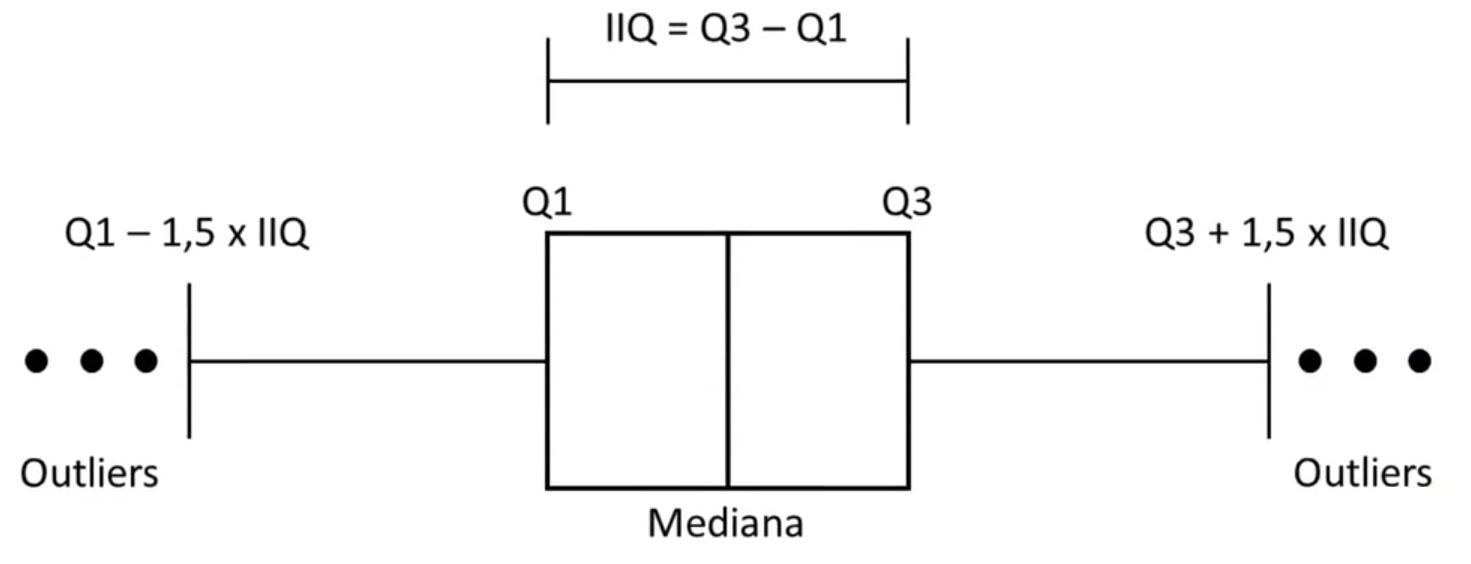

In [48]:
# seaborn para box plot
import seaborn as sns

In [49]:
df_sem_nulo.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


`cliente.tempo_servico` tem um registro com 1080 meses (90 anos).

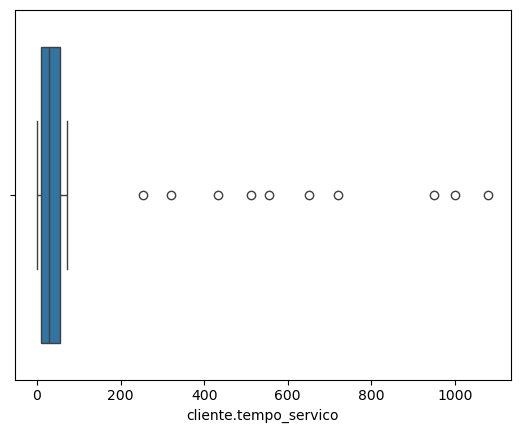

In [50]:
sns.boxplot(x=df_sem_nulo['cliente.tempo_servico']);

Quantis são valores que dividem um conjunto de dados ordenado em partes iguais, com cada parte contendo um número igual de observações. Eles são medidas úteis para entender a distribuição de dados, comparar conjuntos de dados e identificar valores discrepantes.  

Alternativamente as series: 
- Arrays/Series: `np.percentile(arr, porcentagem)`

In [51]:
# Montando os Quantis 
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(q=.25) # 1/4
# Q2 = mediana
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(q=.75) # 3/4

IQR = Q3 - Q1 
limite_superior = Q3 + 1.5*IQR
limite_inferior = Q1 - 1.5*IQR

print(f'Quantis em Meses (clientes.tempo_servico):\n{Q1=}\n{Q3=}\n{IQR=}')

outliers_mask = (df_sem_nulo['cliente.tempo_servico'] > limite_superior) | (df_sem_nulo['cliente.tempo_servico'] < limite_inferior)  # pipe = OR = OU


Quantis em Meses (clientes.tempo_servico):
Q1=9.0
Q3=56.0
IQR=47.0


In [52]:
df_sem_nulo[outliers_mask][['cliente.tempo_servico']]

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [53]:
# Tempo em anos
df_sem_nulo[outliers_mask][['cliente.tempo_servico']] / 12 

,cliente.tempo_servico
1945,90.000000
1946,83.333333
1952,79.166667
1956,21.166667
1958,26.750000
1963,54.166667
1966,60.083333
1970,46.250000
1973,36.083333
1974,42.666667


Substituindo valores para os outliers

In [54]:
# Cópia original independente
df_sem_out = df_sem_nulo.copy()

In [55]:
df_sem_out[outliers_mask][cols_interesse]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,um ano,103.90,112212.00
1946,1000.0,mes a mes,45.90,45900.00
1952,950.0,mes a mes,84.10,79895.00
1956,254.0,mes a mes,46.05,80.35
1958,321.0,mes a mes,99.80,4259.30
1963,650.0,um ano,73.00,47450.00
1966,721.0,mes a mes,89.55,3856.75
1970,555.0,um ano,19.15,124.40
1973,433.0,mes a mes,89.20,346.20
1974,512.0,mes a mes,19.55,19.55


In [56]:
# Substituicão utilizando a relação tempo_servico: cobranca_total/cobranca_mensal

df_sem_out.loc[outliers_mask, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_mask, 'conta.cobranca.Total'] /
    df_sem_out.loc[outliers_mask, 'conta.cobranca.mensal']
)

In [57]:
df_sem_out.loc[outliers_mask, cols_interesse]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,um ano,103.90,112212.00
1946,1000.0,mes a mes,45.90,45900.00
1952,951.0,mes a mes,84.10,79895.00
1956,2.0,mes a mes,46.05,80.35
1958,43.0,mes a mes,99.80,4259.30
1963,650.0,um ano,73.00,47450.00
1966,44.0,mes a mes,89.55,3856.75
1970,7.0,um ano,19.15,124.40
1973,4.0,mes a mes,89.20,346.20
1974,1.0,mes a mes,19.55,19.55


Apenas alguns foram corrigidos com esse critério. Isso porque `conta.cobranca.Total` também contém alguns outliers.

In [58]:
# Atualizando o index dos outliers: 10 amostras -> 4 amostras. Descarta as 4.

Q1 = df_sem_out['cliente.tempo_servico'].quantile(q=.25) # 1/4
Q3 = df_sem_out['cliente.tempo_servico'].quantile(q=.75) # 3/4

IQR = Q3 - Q1 
limite_superior = Q3 + 1.5*IQR
limite_inferior = Q1 - 1.5*IQR

print(f'Quantis em Meses (clientes.tempo_servico):\n{Q1=}\n{Q3=}\n{IQR=}')

outliers_mask = (df_sem_out['cliente.tempo_servico'] > limite_superior) | (df_sem_out['cliente.tempo_servico'] < limite_inferior)  # pipe = OR = OU


Quantis em Meses (clientes.tempo_servico):
Q1=9.0
Q3=55.0
IQR=46.0


In [59]:
df_sem_out[outliers_mask]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [60]:
df_sem_out = df_sem_out[~outliers_mask]

In [61]:
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [62]:
df_sem_out.reset_index(drop=True, inplace=True)

<Axes: xlabel='cliente.tempo_servico'>

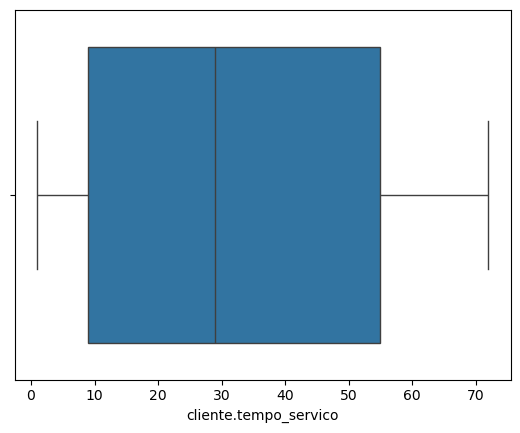

In [63]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

<h2>
<font color="#9de482"> 05 - Dados categóricos </font>
</h2>  

1. Nominais
2. Ordinais
3. Binárias

In [64]:
df_sem_out.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [76]:
# Dropar a id_cliente, inútil pro modelo de ML.
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [77]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


Edição em colunas binárias.
- Sim/Não
- Masculino/feminino

In [78]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1    
}

In [83]:
columns_to_encode = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

df_sem_id[columns_to_encode] = df_sem_id[columns_to_encode].replace(mapeamento).infer_objects(copy=False)

C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_27416\971564215.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[columns_to_encode] = df_sem_id[columns_to_encode].replace(mapeamento).infer_objects(copy=False)


In [93]:
for coluna in df_sem_id.columns:
    print(f"{coluna:-^30}")
    print(f'{df_sem_id[coluna].unique()}')
    

------------Churn-------------
[0 1]
--------cliente.genero--------
[0 1]
--------cliente.idoso---------
[0 1]
-------cliente.parceiro-------
[0 1]
-----cliente.dependentes------
[0 1]
----cliente.tempo_servico-----
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
--telefone.servico_telefone---
[1 0]
----telefone.varias_linhas----
['sim' 'nao' 'sem servico de telefone']
--internet.servico_internet---
['DSL' 'fibra otica' 'nao']
--internet.seguranca_online---
['nao' 'sim' 'sem servico de internet']
----internet.backup_online----
['nao' 'sim' 'sem servico de internet']
internet.protecao_dispositivo-
['nao' 'sim' 'sem servico de internet']
---internet.suporte_tecnico---
['nao' 'sim' 'sem servico de internet']
----internet.tv_streaming-----
['nao' 's

<h4>Dummy | One Hot Encoder</h4>

In [103]:
df_sem_id.dtypes

Churn                              int64
cliente.genero                     int64
cliente.idoso                      int64
cliente.parceiro                   int64
cliente.dependentes                int64
cliente.tempo_servico            float64
telefone.servico_telefone          int64
telefone.varias_linhas            object
internet.servico_internet         object
internet.seguranca_online         object
internet.backup_online            object
internet.protecao_dispositivo     object
internet.suporte_tecnico          object
internet.tv_streaming             object
internet.filmes_streaming         object
conta.contrato                    object
conta.faturamente_eletronico       int64
conta.metodo_pagamento            object
conta.cobranca.mensal            float64
conta.cobranca.Total             float64
dtype: object

In [104]:
pd.get_dummies(data=df_sem_id, dtype=int)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
# Comparando com o dataframe original: Adicionou 21 colunas. num_cols_categoricas* num_unique
df_sem_id.shape

(7002, 20)

In [108]:
df_dummies = pd.get_dummies(df_sem_id,dtype=int, prefix_sep="-").copy()
df_dummies

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming-nao,internet.filmes_streaming-sem servico de internet,internet.filmes_streaming-sim,conta.contrato-dois anos,conta.contrato-mes a mes,conta.contrato-um ano,conta.metodo_pagamento-cartao de credito (automatico),conta.metodo_pagamento-cheque eletronico,conta.metodo_pagamento-cheque pelo correio,conta.metodo_pagamento-transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [110]:
list(df_dummies.columns)

['Churn',
 'cliente.genero',
 'cliente.idoso',
 'cliente.parceiro',
 'cliente.dependentes',
 'cliente.tempo_servico',
 'telefone.servico_telefone',
 'conta.faturamente_eletronico',
 'conta.cobranca.mensal',
 'conta.cobranca.Total',
 'telefone.varias_linhas-nao',
 'telefone.varias_linhas-sem servico de telefone',
 'telefone.varias_linhas-sim',
 'internet.servico_internet-DSL',
 'internet.servico_internet-fibra otica',
 'internet.servico_internet-nao',
 'internet.seguranca_online-nao',
 'internet.seguranca_online-sem servico de internet',
 'internet.seguranca_online-sim',
 'internet.backup_online-nao',
 'internet.backup_online-sem servico de internet',
 'internet.backup_online-sim',
 'internet.protecao_dispositivo-nao',
 'internet.protecao_dispositivo-sem servico de internet',
 'internet.protecao_dispositivo-sim',
 'internet.suporte_tecnico-nao',
 'internet.suporte_tecnico-sem servico de internet',
 'internet.suporte_tecnico-sim',
 'internet.tv_streaming-nao',
 'internet.tv_streaming-sem